In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10,8

#Cargamos los datos desde el Github del Ministerio de Salud, Producto 81.
#df_pob: Población por rango etario y por comuna.
#df_pri: Población por rango etario vacunados con primera dosis.
#df_seg: Población por rango etario vacunados con segunda dosis.
df_pob = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/poblacion_comuna_edad.csv")
df_pri = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv")
df_seg = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_2daDosis.csv")

Consideraremos los grupos etarios de 18 años en adelante

In [102]:
df_pob = df_pob.drop(columns=["Region","Codigo region","Codigo comuna", "Poblacion","12","13","14","15", "16", "17"] ,axis=1)
df_pri = df_pri.drop(columns=["Region","Codigo region","Codigo comuna", "Poblacion","12","13","14","15", "16", "17"] ,axis=1)
df_seg = df_seg.drop(columns=["Region","Codigo region","Codigo comuna", "Poblacion","12","13","14","15", "16", "17"] ,axis=1)

Reasignamos los índices a la comuna correspondiente

In [103]:
df_pob.index = df_pob["Comuna"]
df_pri.index = df_pri["Comuna"]
df_seg.index = df_seg["Comuna"]

Borramos la columna correspondiente a Comuna

In [104]:
df_pob = df_pob.drop("Comuna", axis = 1)
df_pri = df_pri.drop("Comuna", axis = 1)
df_seg = df_seg.drop("Comuna", axis = 1)

Para cada Data Frame, agregaremos el total de población y vacunación para cada rango etario.

In [105]:
edades = df_pob.columns 
total = []
for edad in edades:
    total.append(sum(df_pob[edad].dropna()))

df_total = pd.DataFrame(total, columns=["Total"])
df_total.index = list(edades)
df_pob = df_pob.append(df_total.T, ignore_index=False)
df_pob.tail()

,18,19,20,21,22,23,24,25,26,27,...,71,72,73,74,75,76,77,78,79,80
San Gregorio,3.0,4.0,4.0,5.0,7.0,10.0,10.0,11.0,12.0,14.0,...,4.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,1.0,8.0
Timaukel,0.0,0.0,2.0,3.0,4.0,4.0,6.0,5.0,6.0,7.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
Torres del Paine,4.0,7.0,11.0,17.0,26.0,38.0,46.0,50.0,52.0,53.0,...,6.0,4.0,4.0,2.0,1.0,2.0,2.0,2.0,3.0,9.0
Desconocido Magallanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,251565.0,259382.0,266643.0,273756.0,283395.0,291567.0,300768.0,310246.0,318988.0,326663.0,...,129832.0,120013.0,114500.0,107347.0,99567.0,92332.0,85583.0,79607.0,73865.0,568070.0


In [106]:
total = []
for edad in edades:
    total.append(sum(df_pri[edad].dropna()))

df_total = pd.DataFrame(total, columns=["Total"])
df_total.index = list(edades)
df_pri = df_pri.append(df_total.T, ignore_index=False)
df_pri.tail()

,18,19,20,21,22,23,24,25,26,27,...,71,72,73,74,75,76,77,78,79,80
San Gregorio,3.0,3.0,3.0,6.0,10.0,6.0,7.0,13.0,13.0,15.0,...,2.0,6.0,0.0,0.0,2.0,2.0,3.0,0.0,3.0,7.0
Timaukel,1.0,14.0,2.0,1.0,5.0,3.0,12.0,2.0,5.0,11.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
Torres del Paine,8.0,9.0,17.0,16.0,19.0,11.0,16.0,16.0,12.0,26.0,...,4.0,4.0,6.0,3.0,5.0,1.0,1.0,2.0,1.0,9.0
Desconocido Magallanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,91594.0,142805.0,178305.0,180695.0,186825.0,182149.0,197797.0,206833.0,228033.0,231727.0,...,116975.0,112278.0,106298.0,99951.0,94219.0,88827.0,80696.0,75965.0,69091.0,490675.0


In [107]:
total = []
for edad in edades:
    total.append(sum(df_seg[edad].dropna()))

df_total = pd.DataFrame(total, columns=["Total"])
df_total.index = list(edades)
df_seg = df_seg.append(df_total.T, ignore_index=False)
df_seg.tail()

,18,19,20,21,22,23,24,25,26,27,...,71,72,73,74,75,76,77,78,79,80
San Gregorio,3.0,3.0,1.0,6.0,9.0,5.0,6.0,11.0,13.0,12.0,...,2.0,6.0,0.0,0.0,2.0,2.0,3.0,0.0,3.0,7.0
Timaukel,1.0,14.0,2.0,1.0,5.0,3.0,11.0,1.0,4.0,11.0,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0
Torres del Paine,7.0,9.0,15.0,16.0,17.0,10.0,16.0,13.0,10.0,23.0,...,4.0,4.0,6.0,3.0,5.0,1.0,1.0,1.0,1.0,9.0
Desconocido Magallanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,38440.0,45834.0,52137.0,57864.0,66620.0,74716.0,83529.0,92782.0,143018.0,154899.0,...,113737.0,109360.0,103507.0,97396.0,91818.0,86541.0,78644.0,74108.0,67308.0,476689.0


Con esto, podemos crear una función que dado una comuna (o Total), entregue un Dataframe con su población y vacunados con primera y segunda dosis.

In [108]:
def Vacunacion(comuna):
    dataframe = pd.DataFrame(df_pob.loc[comuna].index, columns=["Edad"])
    dataframe.insert(1,"Poblacion Total", list(df_pob.loc[comuna]))
    dataframe.insert(2,"Primera Dosis", list(df_pri.loc[comuna]))
    dataframe.insert(3,"Segunda Dosis", list(df_seg.loc[comuna]))
    return dataframe

Veamos si funciona para algunas comunas

In [109]:
Vacunacion("Independencia")

,Edad,Poblacion Total,Primera Dosis,Segunda Dosis
0,18,1536.0,258.0,121.0
1,19,1738.0,534.0,145.0
2,20,2000.0,836.0,189.0
3,21,2280.0,940.0,234.0
4,22,2561.0,1042.0,302.0
...,...,...,...,...
58,76,614.0,487.0,473.0
59,77,570.0,425.0,420.0
60,78,532.0,405.0,390.0
61,79,496.0,387.0,377.0


Crearemos una función que retorna los porcentajes de vacunación respecto al total de la población, para cada comuna.

In [110]:
def Vacunacion_porcentaje(comuna):
    porcentaje_primera_dosis = np.divide(list(df_pri.loc[comuna]),  list(df_pob.loc[comuna]))
    porcentaje_segunda_dosis = np.divide(list(df_seg.loc[comuna]),  list(df_pob.loc[comuna]))
    #Creamos Dataframe
    dataframe = pd.DataFrame(df_pob.loc[comuna].index, columns=["Edad"])
    dataframe.insert(1,"primera dosis", 100*porcentaje_primera_dosis)
    dataframe.insert(2,"segunda dosis", 100*porcentaje_segunda_dosis)
    return dataframe

In [111]:
Vacunacion_porcentaje("Independencia")

,Edad,primera dosis,segunda dosis
0,18,16.796875,7.877604
1,19,30.724971,8.342923
2,20,41.800000,9.450000
3,21,41.228070,10.263158
4,22,40.687232,11.792269
...,...,...,...
58,76,79.315961,77.035831
59,77,74.561404,73.684211
60,78,76.127820,73.308271
61,79,78.024194,76.008065


Con esta información podemos graficar

In [115]:
def Graficar(comuna):
    fig = plt.figure()
    plt.bar(x=list(range(18,81)), height = Vacunacion_porcentaje(comuna)["primera dosis"], label="Primera Dosis")
    plt.bar(x=list(range(18,81)), height = Vacunacion_porcentaje(comuna)["segunda dosis"], label="Segunda Dosis")
    plt.title("Porcentajes de Vacunación {}".format(comuna), fontsize=15)
    plt.grid()
    plt.xlabel("Rango Etario", fontsize=15)
    plt.ylabel("Porcentaje $(\%)$", fontsize=15)
    plt.legend()

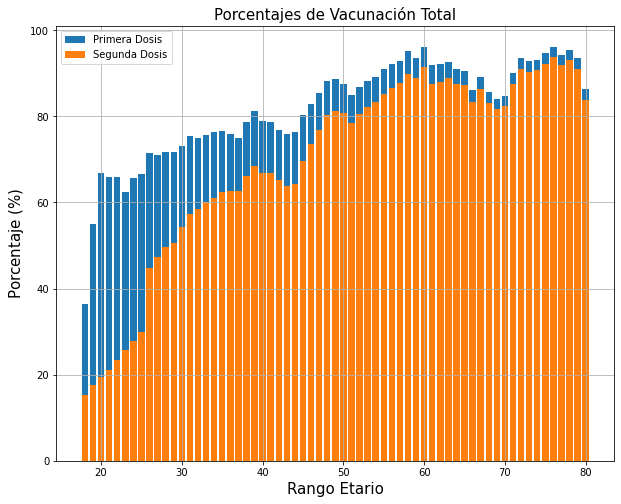

In [116]:
Graficar("Total")

Del gráfico podemos observar que:
- Los rangos etarios que más se han vacunado con ambas dosis son los de 72 a 79 años.
- A medida que disminuye el rango etario más aumenta el número de rezagados (que solo tienen primera dosis).
- Los rangos etarios menores son mas reacios a la vacunación.


Por otra parte, de algunos gráficos podemos dar a conocer errores en los datos, como que sobrepasen el 100% de vacunación

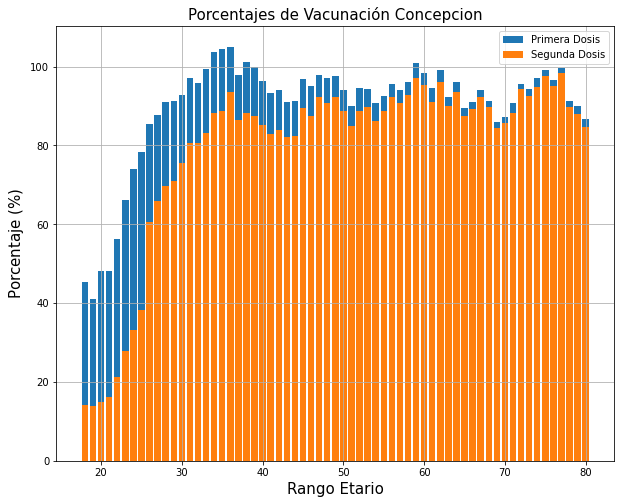

In [132]:
Graficar("Concepcion")

In [133]:
Vacunacion("Concepcion")[Vacunacion("Concepcion")["Edad"]=="35"]

,Edad,Poblacion Total,Primera Dosis,Segunda Dosis
17,35,3094.0,3235.0,2747.0


En la comuna de Concepción aparece mayor cantidad de vacunados con primera dosis que población, dicho error aparece en diversas comunas como Putre, Huara, entre otras.